# GPR to predict the number of atoms
## input spectra, for predict Cu,Te seperately and predict them both 
## input 1st and/or 2nd derivative data to predict Cu,Te together
### summary: for individual predict, spectra better predict Te, derivate better predict Cu; If predict Cu and Te together, using first derivative data will give the best result. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('mu_cn10000.csv')
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
5,9.532384,5.028370,4.504014,0.030601,0.033068,0.035442,0.037834,0.040355,0.043115,0.046225,...,1.003948,1.004135,1.004461,1.004956,1.005649,1.006566,1.007738,1.009192,1.010956,1.013060
6,9.143018,4.468513,4.674505,0.031489,0.034139,0.036673,0.039218,0.041900,0.044846,0.048181,...,1.003807,1.002924,1.002072,1.001246,1.000438,0.999643,0.998855,0.998067,0.997274,0.996469
7,9.991363,5.746311,4.245052,0.030807,0.033405,0.035882,0.038357,0.040951,0.043782,0.046969,...,1.000709,1.002812,1.005148,1.007705,1.010469,1.013428,1.016569,1.019880,1.023348,1.026961
8,9.304599,4.701765,4.602833,0.031290,0.033952,0.036489,0.039028,0.041695,0.044616,0.047917,...,1.003620,1.003435,1.003308,1.003226,1.003172,1.003133,1.003093,1.003036,1.002949,1.002816
9,9.000000,4.067356,4.932644,0.030855,0.033388,0.035816,0.038259,0.040832,0.043654,0.046841,...,1.015342,1.012058,1.008637,1.005156,1.001692,0.998320,0.995118,0.992161,0.989527,0.987291


## 1. create noise for all the 10000 sample
## 2. use specta with noise to get the 1 & 2 derivate 
## 3. use spectra with all energy-mu points 
## 4. use 1&2 derivate to predict CN 


In [4]:
def GPR_get_CN(features, labels):
    #parameter: features, labels
    # Using Skicit-learn to split data into training and testing sets
    from sklearn.model_selection import train_test_split
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
#     print('Training Features Shape:', train_features.shape)
#     print('Training Labels Shape:', train_labels.shape)
#     print('Testing Features Shape:', test_features.shape)
#     print('Testing Labels Shape:', test_labels.shape)
    # Import the model we are using
    import sklearn.gaussian_process as gp
    kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
    model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    gpr = model.fit(train_features, train_labels)
    params = model.kernel_.get_params()
    pred_labels, std = model.predict(test_features, return_std=True)
    MSE = ((pred_labels-test_labels)**2).mean()
    print('MSE = ', MSE)
    from sklearn.metrics import r2_score
    rSquare = r2_score(test_labels, pred_labels)
    print('R Squared Error:', rSquare)
    return rSquare

In [5]:
def add_noise_to_averaged_spectra_df_return_smooth(df):
    '''
    pre: df should have columns named "Mu1" to "Mu100"
    add noise to the spectra, np.random.normal(0,0.015,1000)
    ysmooth = savgol_filter(y2, 51, 2)
    post:return the np.array, each spectra after smooth mu value; 
    '''
    if 'Mu1' in df.columns:
        features=np.array(df.loc[:,'Mu1':'Mu100'])
    else:
        features=np.array(df)
            
    xs = np.linspace(8970, 9050, 1000)
    energies = np.linspace(8970, 9050, 100)
    smooth=np.array([])
    for i in range(features.shape[0]):
        s1 = UnivariateSpline(energies, features[i], s=0)
        y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
        noise = np.random.normal(0,0.015,1000)
        y2 = y1+ noise
        ysmooth = savgol_filter(y2, 51, 2)
        smooth = np.concatenate((smooth,ysmooth),axis=0)
        
    # return the smooth spectra np.array
    after_smooth=smooth.reshape(len(df.index),1000)
    return after_smooth

In [6]:
def xanes_derivatives(mu_df, dx=0.80808080808):
    '''
    This function calculates and returns the first and second derivative of a series of XANES spectra.
    Inputs:
        mu_df = Pandas dataframe of averaged XANES spectra absorption values.
        dx = distance between uniformly distributed energy values in XANES spectra. Defaulted to value provided in data.
    '''
    for nums in range(len(mu_df)):
        if nums == 0:
            pass

    dmu1 = np.zeros([len(mu_df), len(mu_df.columns)])
    dmu2 = np.zeros([len(mu_df), len(mu_df.columns)])
    if len(mu_df.columns) == 1000:
        dx =0.1*dx

    for i in range(len(mu_df)):
        for j in range(len(mu_df.columns)):
            if j == len(mu_df.columns)-1:
                pass
            else:
                dmu1[i, j] = (mu_df.iloc[i, j+1] - mu_df.iloc[i, j]) / dx

    for i_ in range(len(mu_df)):
        for j_ in range(len(mu_df.columns)):
            if j_ == len(mu_df.columns)-1:
                pass
            else:
                dmu2[i_, j_] = (dmu1[i_, j_+1] - dmu1[i_, j_]) / dx

    return dmu1, dmu2

In [7]:
def normalization_spectra(df):
    '''
    use a raw spectra as parameter and return the after normalization spectra(np.array)
    all of the data are dividede by the highest absorption
    reurn 100 data point
    '''
    features=np.array(df.loc[:,'Mu1':'Mu100'])
    normalization_features = np.array([[0.0]*(np.size(features, 1))]*(np.size(features, 0)))
    for i in range(len(features)):
        max_absorption = np.amax(features[i])
        j = 0
        for absorption in features[i]:
            normlization_absoprtion = absorption/max_absorption
            normalization_features[i][j]=normlization_absoprtion
            j=j+1
    return normalization_features

In [8]:
def smooth_spectra(ndarray,windowSize=51, polynomial=2, datapoints=1000):
    smooth=np.array([])
    xs = np.linspace(8970, 9050, datapoints)
    energies= np.linspace(8970, 9050, len(ndarray[0]))
    for i in range(len(ndarray)):
        y2 = ndarray[i]
        s1 = UnivariateSpline(energies, y2, s=0)
        after_smooth_contiuous_y = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter        
        ysmooth = savgol_filter(after_smooth_contiuous_y, windowSize, polynomial)
        smooth = np.concatenate((smooth,ysmooth),axis=0)
    after_smooth=smooth.reshape(len(ndarray),datapoints)
    return after_smooth

In [9]:
def add_noise(df,std=0.015):
    if 'Mu1' in df.columns:
        features=np.array(df.loc[:,'Mu1':'Mu100'])
    else:
        features=np.array(df)
            
    xs = np.linspace(8970, 9050, 1000)
    energies = np.linspace(8970, 9050, 100)
    y_noise=np.array([])
    for i in range(features.shape[0]):
        s1 = UnivariateSpline(energies, features[i], s=0)
        y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
        noise = np.random.normal(0,std,1000)
        y2 = y1+ noise
        y_noise = np.concatenate((y_noise,y2),axis=0)
    return y_noise.reshape(len(df.index),1000)

In [10]:
def one_demension_get_N_evenly_spaced_elements(arr, numElems):
    '''
    return nd.array
    '''
    idx = np.round(np.linspace(0, len(arr) - 1, numElems)).astype(int)
    return arr[idx]

In [11]:
def ndArray_get_N_evely_spaced_elements(after_smooth, numElems):
    ndArray_evenly_spaced=np.array([])
    for arr in after_smooth:
        a_row_evenly_spaced=one_demension_get_N_evenly_spaced_elements(arr, numElems)
        print(a_row_evenly_spaced)
        #ndArray_evenly_spaced=np.concatenate((ndArray_evenly_spaced, [a_row_evenly_spaced]),axis=0)
        ndArray_evenly_spaced  = np.append(ndArray_evenly_spaced, a_row_evenly_spaced, axis=0)
    return ndArray_evenly_spaced.reshape(len(after_smooth),numElems)

plot two graph; One for Parity plot 0.01 std, another for RMSE,R2 for spectra, 1st, 1&2 derivative 

In [12]:
def GPR_get_CN_parity_plot(features, labels,min_value, max_value,title):
    #parameter: features, labels
    # Using Skicit-learn to split data into training and testing sets
    from sklearn.model_selection import train_test_split
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
    import sklearn.gaussian_process as gp
    kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
    model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    gpr = model.fit(train_features, train_labels)
    params = model.kernel_.get_params()
    pred_labels, std = model.predict(test_features, return_std=True)
    MSE = ((pred_labels-test_labels)**2).mean()
    print('MSE = ', MSE)
    from sklearn.metrics import r2_score
    rSquare = r2_score(test_labels, pred_labels)
    print('R Squared Error:', rSquare)
    
    fig, axs = plt.subplots(1,1,figsize=(4,4))
    axs.scatter(test_labels, pred_labels)
    axs.plot(np.linspace(min_value,max_value), np.linspace(min_value,max_value), color = 'red')
    axs.set_ylabel('Predicted_test')
    axs.set_xlabel('Actual_test')
    axs.set_title(title)
    return rSquare

In [13]:
#noise std = 0.01, smooth twice,  101, 3 then 51, 2 
#use first 500 data
df_sample = df
#normalize
normalized_df_sample= normalization_spectra(df_sample)
# add noise to the normalized spectra
add_noise_0_01_spectra=add_noise(pd.DataFrame(normalized_df_sample),std=0.01)
#smooth once
smooth_once_spectra=smooth_spectra(add_noise_0_01_spectra,windowSize=101, polynomial=3, datapoints=1000)
#smooth twice
smooth_twice_spectra=smooth_spectra(smooth_once_spectra,windowSize=51, polynomial=2, datapoints=1000)
#use smoothed spectra to predict CN
r_2=GPR_get_CN(features = smooth_twice_spectra, labels = np.array(df['CN']))


/software/conda/envs/deepchem/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


MSE =  0.013724051350451776
R Squared Error: 0.9285676285154391


MSE =  0.013724050395174327
R Squared Error: 0.9285676334875665


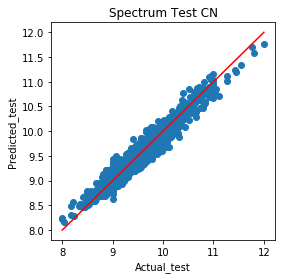

In [14]:
r_2=GPR_get_CN_parity_plot(features = smooth_twice_spectra, labels = np.array(df['CN']), 
                           min_value = 8, max_value =12, title = 'Spectrum Test CN')

MSE =  0.01423078848592306
R Squared Error: 0.9565453620810913


0.9565453620810913

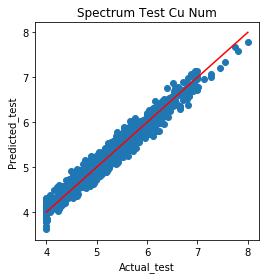

In [15]:
GPR_get_CN_parity_plot(features = smooth_twice_spectra, labels = np.array(df['Num Cu']), 
                           min_value = 4, max_value =8, title = 'Spectrum Test Cu Num')

MSE =  0.0003737083588726232
R Squared Error: 0.9925334094350218


0.9925334094350218

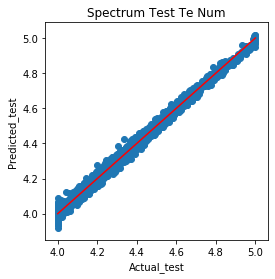

In [16]:
GPR_get_CN_parity_plot(features = smooth_twice_spectra, labels = np.array(df['Num Te']), 
                           min_value = 4, max_value =5, title = 'Spectrum Test Te Num')

In [17]:
dmu1, dmu2 =xanes_derivatives(pd.DataFrame(smooth_twice_spectra))

MSE =  0.014335725271379749
R Squared Error: 0.9253839244012959


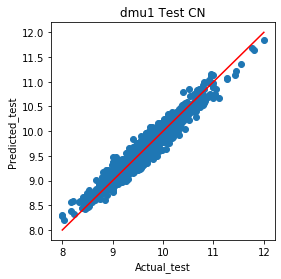

In [18]:
r_2=GPR_get_CN_parity_plot(features = dmu1, labels = np.array(df['CN']), 
                           min_value = 8, max_value =12, title = 'dmu1 Test CN')

MSE =  0.014976713068866066
R Squared Error: 0.9542676328675157


0.9542676328675157

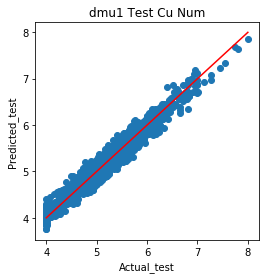

In [19]:
GPR_get_CN_parity_plot(features = dmu1, labels = np.array(df['Num Cu']), 
                           min_value = 4, max_value =8, title = 'dmu1 Test Cu Num')

MSE =  0.00040978386162573353
R Squared Error: 0.9918126307794525


0.9918126307794525

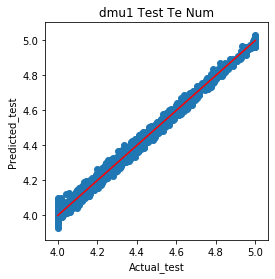

In [20]:
GPR_get_CN_parity_plot(features = dmu1, labels = np.array(df['Num Te']), 
                           min_value = 4, max_value =5, title = 'dmu1 Test Te Num')

In [21]:
dmu_both= np.concatenate((dmu1,dmu2),axis=1)

MSE =  0.017592854400924243
R Squared Error: 0.9084308795595373


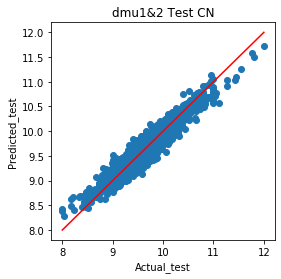

In [22]:
r_2=GPR_get_CN_parity_plot(features = dmu_both, labels = np.array(df['CN']), 
                           min_value = 8, max_value =12, title = 'dmu1&2 Test CN')

In [ ]:
GPR_get_CN_parity_plot(features = dmu_both, labels = np.array(df['Num Cu']), 
                           min_value = 4, max_value =8, title = 'dmu1&2 Test Cu Num')

In [ ]:
GPR_get_CN_parity_plot(features = dmu_both, labels = np.array(df['Num Te']), 
                           min_value = 4, max_value =5, title = 'dmu1&2 Test Te Num')

def GPR_get_CN_R2_MSE(features, labels):
    #parameter: features, labels
    # Using Skicit-learn to split data into training and testing sets
    from sklearn.model_selection import train_test_split
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
#     print('Training Features Shape:', train_features.shape)
#     print('Training Labels Shape:', train_labels.shape)
#     print('Testing Features Shape:', test_features.shape)
#     print('Testing Labels Shape:', test_labels.shape)
    # Import the model we are using
    import sklearn.gaussian_process as gp
    kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
    model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    gpr = model.fit(train_features, train_labels)
    params = model.kernel_.get_params()
    pred_labels, std = model.predict(test_features, return_std=True)
    MSE = ((pred_labels-test_labels)**2).mean()
    RMSE = MSE**0.5
    #print('MSE = ', MSE)
    from sklearn.metrics import r2_score
    rSquare = r2_score(test_labels, pred_labels)
    #print('R Squared Error:', rSquare)
    return rSquare, RMSE

In [ ]:
# another for RMSE,R2 for spectra, 1st, 1&2 derivative 
# 4 list: Spectra, dmu1, dmu2, both
# subplot, R2 vs std , RMSE vs std 
# for std 
def plot_R2_RMSE_vs_std_noise(normalized_df_sample, target):
    '''
    features are input value, e.g. dmu1, smooth_twice_spectra
    target is the traget predict column name e.g, 'CN'
    '''
    r2_list=[]
    RMSE_list=[]
    std_list=[]

    
    #use smoothed spectra to predict CN
    for n in np.arange(0.005, 0.055, 0.005):
        print("std = ")
        print(n)
        # add noise to the normalized spectra
        add_noise_0_01_spectra=add_noise(pd.DataFrame(normalized_df_sample),std=n)
        #smooth once
        smooth_once_spectra=smooth_spectra(add_noise_0_01_spectra,windowSize=101, polynomial=3, datapoints=1000)
        #smooth twice
        smooth_twice_spectra=smooth_spectra(smooth_once_spectra,windowSize=51, polynomial=2, datapoints=1000)
        spectra_r2,spectra_RMSE=GPR_get_CN_R2_MSE(features = smooth_twice_spectra, labels = np.array(df[:500][target]))
        dmu1, dmu2 =xanes_derivatives(pd.DataFrame(smooth_twice_spectra))
        dmu1_r2,dmu1_RMSE=GPR_get_CN_R2_MSE(features = dmu1, labels = np.array(df[:500][target]))
        dmu2_r2,dmu2_RMSE=GPR_get_CN_R2_MSE(features = dmu2, labels = np.array(df[:500][target]))
        dmu_both= np.concatenate((dmu1,dmu2),axis=1)
        both_r2,both_RMSE=GPR_get_CN_R2_MSE(features = dmu_both, labels = np.array(df[:500][target]))   
        r2_list.append([spectra_r2,dmu1_r2, dmu2_r2,both_r2])
        RMSE_list.append([spectra_RMSE,dmu1_RMSE,dmu2_RMSE,both_RMSE])
        std_list.append(n)
    RMSE_list = np.array(RMSE_list)
    r2_list=np.array(r2_list)
    return RMSE_list, r2_list

In [ ]:
plot_R2_RMSE_vs_std_noise(normalized_df_sample, target = 'CN')

In [ ]:
plot_R2_RMSE_vs_std_noise(normalized_df_sample, target = 'Num Cu')

In [ ]:
plot_R2_RMSE_vs_std_noise(normalized_df_sample, target = 'Num Te')

In [ ]:
# result from CN 
RMSE_list=np.array([[0.09132968, 0.10994474, 0.23020162, 0.14269039],
        [0.14323531, 0.16480514, 0.29469107, 0.214672  ],
        [0.16349365, 0.20454483, 0.32950318, 0.25820224],
        [0.20240554, 0.23734602, 0.34723851, 0.28367855],
        [0.22494082, 0.2482028 , 0.348842  , 0.29096687],
        [0.25287822, 0.27833254, 0.35809334, 0.30554668],
        [0.26498765, 0.29122925, 0.38204881, 0.32216752],
        [0.27623361, 0.30167857, 0.38141942, 0.33379163],
        [0.29738632, 0.33451644, 0.39448072, 0.35387933],
        [0.29404449, 0.32126046, 0.39237711, 0.34589417]])
r2_list=np.array([[0.96531161, 0.94972997, 0.77961754, 0.91532607],
        [0.91467812, 0.88704597, 0.63884452, 0.80834901],
        [0.88883654, 0.82600479, 0.5484774 , 0.72274443],
        [0.82962532, 0.76572597, 0.49856339, 0.66533271],
        [0.78957525, 0.74380325, 0.4939216 , 0.64791514],
        [0.73406034, 0.67782768, 0.46672313, 0.61174647],
        [0.70798072, 0.64727987, 0.39298704, 0.56835792],
        [0.68266842, 0.62151457, 0.39498539, 0.53664788],
        [0.63220804, 0.53463343, 0.35283977, 0.47920038],
        [0.6404276 , 0.57078507, 0.35972344, 0.50243853]])
std_list=np.arange(0.005, 0.055, 0.005)
plt.figure(figsize=[12,12])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(2,1,1)
ax1.plot(std_list,RMSE_list[:,0],label="Spectrum",color='b')
ax1.plot(std_list,RMSE_list[:,1],label="dmu1", color = 'g')
ax1.plot(std_list,RMSE_list[:,2],label="dmu2", color = 'r')
ax1.plot(std_list,RMSE_list[:,3],label="dmu1&2", color = 'c' )
ax1.set_xlabel('STD of Noise')
ax1.set_ylabel('RMSE of prediction')
plt.legend()
plt.show()
plt.figure(figsize=[12,12])
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel('STD of Noise')
ax2.set_ylabel('R2 of prediction')
ax2.plot(std_list,r2_list[:,0],label="Spectrum",color='b')
ax2.plot(std_list,r2_list[:,1],label="dmu1",color='g')
ax2.plot(std_list,r2_list[:,2],label="dmu2",color='r')
ax2.plot(std_list,r2_list[:,3],label="dmu1&2",color='c')
plt.legend()
plt.show()

In [ ]:
# result from CN 
RMSE_list=np.array([[0.09132968, 0.10994474, 0.23020162, 0.14269039],
        [0.14323531, 0.16480514, 0.29469107, 0.214672  ],
        [0.16349365, 0.20454483, 0.32950318, 0.25820224],
        [0.20240554, 0.23734602, 0.34723851, 0.28367855],
        [0.22494082, 0.2482028 , 0.348842  , 0.29096687],
        [0.25287822, 0.27833254, 0.35809334, 0.30554668],
        [0.26498765, 0.29122925, 0.38204881, 0.32216752],
        [0.27623361, 0.30167857, 0.38141942, 0.33379163],
        [0.29738632, 0.33451644, 0.39448072, 0.35387933],
        [0.29404449, 0.32126046, 0.39237711, 0.34589417]])
r2_list=np.array([[0.96531161, 0.94972997, 0.77961754, 0.91532607],
        [0.91467812, 0.88704597, 0.63884452, 0.80834901],
        [0.88883654, 0.82600479, 0.5484774 , 0.72274443],
        [0.82962532, 0.76572597, 0.49856339, 0.66533271],
        [0.78957525, 0.74380325, 0.4939216 , 0.64791514],
        [0.73406034, 0.67782768, 0.46672313, 0.61174647],
        [0.70798072, 0.64727987, 0.39298704, 0.56835792],
        [0.68266842, 0.62151457, 0.39498539, 0.53664788],
        [0.63220804, 0.53463343, 0.35283977, 0.47920038],
        [0.6404276 , 0.57078507, 0.35972344, 0.50243853]])
std_list=np.arange(0.005, 0.055, 0.005)
plt.figure(figsize=[12,12])
plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(2,1,1)
ax1.plot(std_list,RMSE_list[:,0],label="Spectrum",color='b')
ax1.plot(std_list,RMSE_list[:,1],label="dmu1", color = 'g')
ax1.plot(std_list,RMSE_list[:,2],label="dmu2", color = 'r')
ax1.plot(std_list,RMSE_list[:,3],label="dmu1&2", color = 'c' )
ax1.set_xlabel('STD of Noise')
ax1.set_ylabel('RMSE of prediction')
plt.legend()
plt.show()
plt.figure(figsize=[12,12])
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel('STD of Noise')
ax2.set_ylabel('R2 of prediction')
ax2.plot(std_list,r2_list[:,0],label="Spectrum",color='b')
ax2.plot(std_list,r2_list[:,1],label="dmu1",color='g')
ax2.plot(std_list,r2_list[:,2],label="dmu2",color='r')
ax2.plot(std_list,r2_list[:,3],label="dmu1&2",color='c')
plt.legend()
plt.show()